```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
!pip install transformers

In [ ]:
from transformers import BlenderbotTokenizer, BlenderbotForConditionalGeneration
import torch

# Diagram

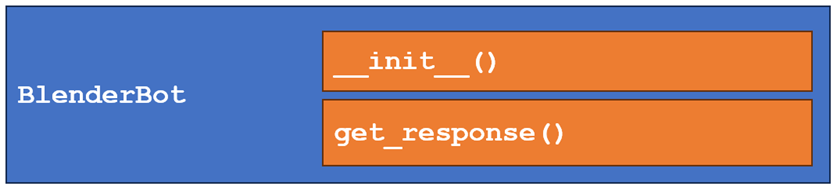

# Code

In [ ]:
class BlenderBot:
    def __init__(self, model_name="facebook/blenderbot-400M-distill"):
        self.tokenizer = BlenderbotTokenizer.from_pretrained(model_name)
        self.model = BlenderbotForConditionalGeneration.from_pretrained(model_name)
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model.to(self.device)

    def get_response(self, user_input):
        input_ids = self.tokenizer([user_input], return_tensors="pt", truncation=True, max_length=512).input_ids.to(self.device)
        with torch.no_grad():
            response_ids = self.model.generate(input_ids, max_length=512, num_return_sequences=1)
        response = self.tokenizer.decode(response_ids[0], skip_special_tokens=True)

        return response

In [ ]:
def chat_with_bot():
    bot = BlenderBot()

    print("Bot: Hi! How can I assist you today?")
    while True:
        user_input = input("You: ")

        if user_input.lower() in ["quit", "exit", "bye"]:
            print("Bot: Goodbye!")
            break

        bot_response = bot.get_response(user_input)
        print(f"Bot: {bot_response}")

# Execution

In [ ]:
chat_with_bot()